In [1]:
### Packages Importing

In [2]:
conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.9.2




In [3]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
from IPython.display import Image


In [5]:
# Data Loading

In [6]:

# Load the data
data = pd.read_excel("E:/Data Analytics Projects/Grocery Bill Analysis/data/processed_data.xlsx")
data

,Date Key,Store Key,Store Name,Store Type,Product Key,Product Name,Product Department,Transaction #,Dollar Sales,Units Sold,Customer ID,Age,Income,Veg or Non-Veg,Offer,Purchased
0,2022-02-01,2,Costco,Retail,P125,Beer,Alcohol,1389,25.54,2,CID404,< 30,> = 20k,Veg,No,Yes
1,2022-02-01,2,Costco,Retail,P117,Blueberries,Produce,1972,32.43,5,CID404,< 30,> = 20k,Veg,No,Yes
2,2022-02-01,2,Costco,Retail,P109,Bread,Bakery,4269,29.11,3,CID404,< 30,> = 20k,Veg,No,Yes
3,2022-02-01,2,Costco,Retail,P114,Carrots,Produce,2033,39.98,7,CID404,< 30,> = 20k,Veg,No,Yes
4,2022-02-01,2,Costco,Retail,P114,Carrots,Produce,4583,27.83,8,CID403,< 30,< 20k,Veg,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,2023-12-01,2,Costco,Wholesale,P130,Turkey,Meat,9963,4.54,10,CID424,< 30,> = 20k,Non-Veg,Yes,Yes
551,2023-12-01,1,Zehrs,Retail,P130,Turkey,Meat,8652,6.83,6,CID425,> = 30,< 20k,Non-Veg,Yes,Yes
552,2023-12-01,1,Zehrs,Retail,P142,Vinegar,Condiments,0,0.00,0,CID423,< 30,< 20k,Veg,Yes,No
553,2023-12-01,3,FreshCo,Retail,P126,Wine,Alcohol,8122,46.49,7,CID426,> = 30,> = 20k,Veg,Yes,Yes


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Load the data
data = pd.read_excel("E:/Data Analytics Projects/Grocery Bill Analysis/data/processed_data.xlsx")
print(data.shape)
print(data.head())

# Prepare the feature variables (X) and target variable (y)
X = data.drop(["Date Key", "Store Key", "Product Name", "Product Key",
               "Transaction #", "Store Type", "Income"], axis=1)
y = data["Income"]

# Convert categorical features to dummy variables (if necessary)
X_d = pd.get_dummies(X, drop_first=True)
print(X_d.shape)
print(X_d.head())

# Update feature columns dynamically to match the transformed data
feature_cols = X_d.columns.tolist()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_d, y, test_size=0.20, random_state=101)

# Initialize and train the Decision Tree model
des = dd(max_depth=3)
grc_d = des.fit(X_train, y_train)



(555, 16)
    Date Key  Store Key Store Name Store Type Product Key Product Name  \
0 2022-02-01          2     Costco     Retail        P125         Beer   
1 2022-02-01          2     Costco     Retail        P117  Blueberries   
2 2022-02-01          2     Costco     Retail        P109        Bread   
3 2022-02-01          2     Costco     Retail        P114      Carrots   
4 2022-02-01          2     Costco     Retail        P114      Carrots   

  Product Department  Transaction #  Dollar Sales  Units Sold Customer ID  \
0            Alcohol           1389         25.54           2      CID404   
1            Produce           1972         32.43           5      CID404   
2             Bakery           4269         29.11           3      CID404   
3            Produce           2033         39.98           7      CID404   
4            Produce           4583         27.83           8      CID403   

    Age   Income Veg or Non-Veg Offer Purchased  
0  < 30  > = 20k            Veg 

Accuracy of the model is :  65.76576576576578 

              precision    recall  f1-score   support

       < 20k       1.00      0.30      0.46        54
     > = 20k       0.60      1.00      0.75        57

    accuracy                           0.66       111
   macro avg       0.80      0.65      0.60       111
weighted avg       0.79      0.66      0.61       111



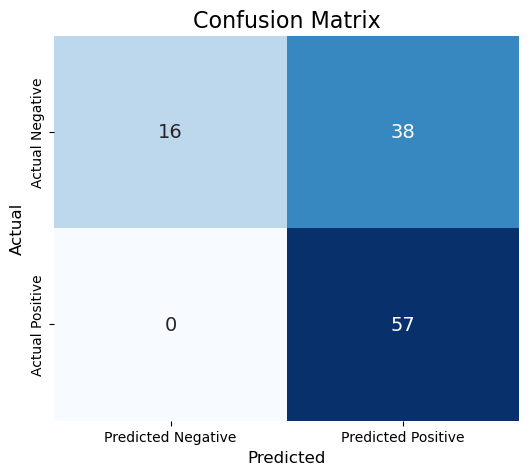

In [8]:

# Make predictions on the test set
Z = grc_d.predict(X_test)

# Print accuracy
print('Accuracy of the model is : ', accuracy_score(y_test, Z) * 100, '\n')

# Print classification report
print(classification_report(y_test, Z))

# Generate confusion matrix
cm = confusion_matrix(y_test, Z)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'], cbar=False, annot_kws={"size": 14})

plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()


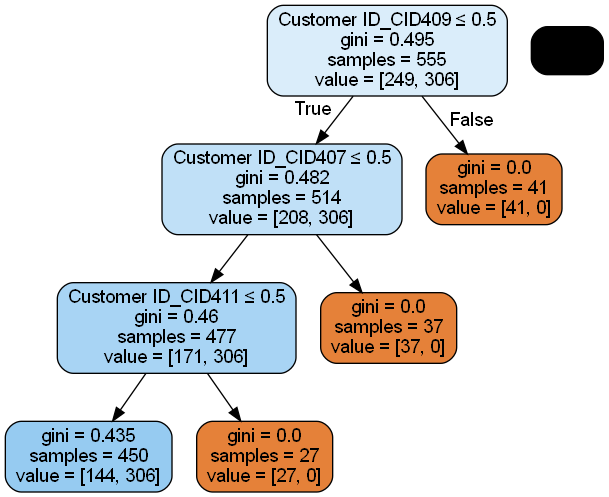

In [9]:

# Train the Decision Tree model on the entire dataset
des = dd(max_depth=3)
data_grocery = des.fit(X_d, y)

# Export the decision tree to dot format
dot_data = StringIO()
export_graphviz(data_grocery, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols)

# Create the graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Display the decision tree
Image(graph.create_png())


In [10]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation to assess model performance
cv_scores = cross_val_score(des, X_d, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [0.71171171 0.54954955 0.64864865 0.54954955 0.54954955]
Mean cross-validation score: 0.6018018018018019


In [11]:
# Tune Hyperparameters

In [12]:
des = dd(max_depth=5, min_samples_split=10, min_samples_leaf=5)


In [13]:
# Cross-Validation with Stratification: 

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(des, X_d, y, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())


Cross-validation scores: [0.71171171 0.54954955 0.64864865 0.61261261 0.54954955]
Mean cross-validation score: 0.6144144144144145


In [16]:
# Hyperparameter Tuning

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dd(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9684371807967314


In [ ]:
# Pruning the Tree:

In [18]:
path = des.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
trees = []
for ccp_alpha in ccp_alphas:
    tree = dd(random_state=0, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

# Evaluate the performance of each tree
tree_accuracies = [tree.score(X_test, y_test) for tree in trees]
best_tree = trees[tree_accuracies.index(max(tree_accuracies))]


In [ ]:
# Feature Engineering:

In [ ]:
from sklearn.feature_selection import RFE

selector = RFE(des, n_features_to_select=5)
selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.support_]
print("Selected features:", selected_features)


In [ ]:
# Use an Ensemble Method

In [ ]:
# Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=101)
rf.fit(X_train, y_train)
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)) * 100)
